## Nội dung

Dữ liệu: bank marketing - dự đoán khách hàng tiềm năng (nguồn: https://archive.ics.uci.edu/ml/datasets/bank+marketing)

1. Phân tích mô tả
2. Áp dụng Logistic Regression để phân loại khách hàng
3. Áp dụng k-Nearesr Neighbors để phân loại khách hàng

##### Đọc dữ liệu

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/bank_marketing.csv')
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


##### Phân tích mô tả
- `TODO`

<AxesSubplot:ylabel='deposit'>

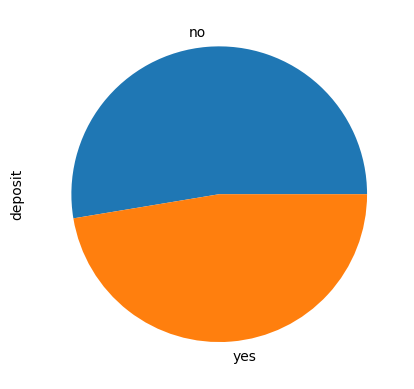

In [4]:
df['deposit'].value_counts().plot.pie()

##### Kiểm tra dữ liệu khuyết

In [5]:
# todo
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

##### Chuẩn bị dữ liệu huấn luyện

In [6]:
# encode trường deposit
# sử dụng map: yes: 1, no: 0
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

In [8]:
# encode onehot các thuộc tính còn lại
df = pd.get_dummies(df)

In [9]:
df.head()

age  balance  day  duration  campaign  pdays  previous  deposit  \
0   59     2343    5      1042         1     -1         0        1   
1   56       45    5      1467         1     -1         0        1   
2   41     1270    5      1389         1     -1         0        1   
3   55     2476    5       579         1     -1         0        1   
4   54      184    5       673         2     -1         0        1   

   job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0           1                0  ...          0          0          1   
1           1                0  ...          0          0          1   
2           0                0  ...          0          0          1   
3           0                0  ...          0          0          1   
4           1                0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          0          0          0                 0               0   
1          0          0          0                 0               0   
2          0          0          0                 0               0   
3          0          0          0                 0               0   
4          0          0          0                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 52 columns]

In [10]:
# y ~ deposit, X ~ các thuộc tính còn lại (trừ deposit)
y = df['deposit']
X = df.drop(['deposit', 'duration'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split

# chia train/test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

##### Huấn luyện knn

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# todo
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

In [14]:
train_score = knn.score(X_train, y_train)
train_score

0.7318848695262627

In [15]:
knn.score(X_test, y_test)

0.5826242722794447

##### Cải thiện mô hình

- Tìm số k phù hợp
- Thay đổi weights
- Thay đổi metrics
- Chuẩn hóa dữ liệu

In [16]:
k_list = list(range(1, 31, 1))
train_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    
    score = knn.score(X_train, y_train)
    
    train_scores.append(score)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

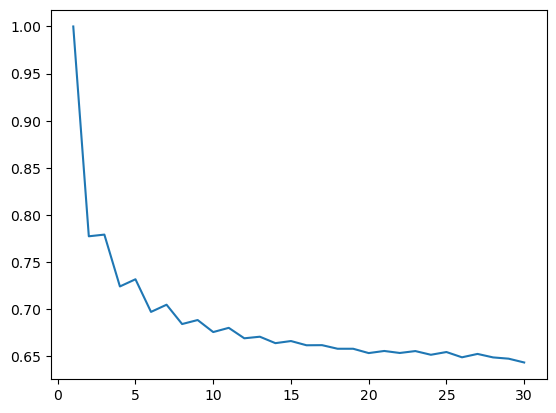

In [23]:
plt.plot(k_list, train_scores)

In [25]:
import numpy as np

In [26]:
k_list[np.argmax(train_scores)]

1

In [27]:
train_scores[0]

1.0

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=99)

In [33]:
k_list = list(range(1, 31, 1))
train_scores = []
valid_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    
    score = knn.score(X_train, y_train)
    val_score = knn.score(X_valid, y_valid)
    
    train_scores.append(score)
    valid_scores.append(val_score)

KeyboardInterrupt: 

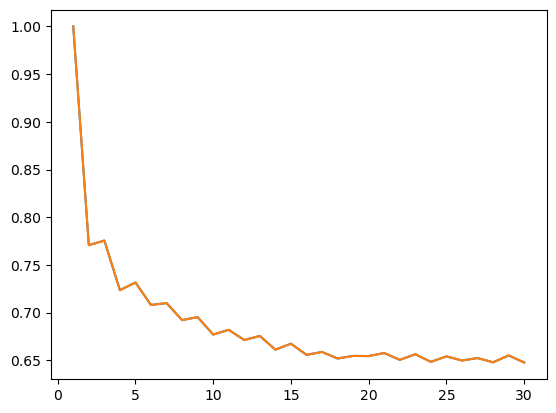

In [32]:
fig, ax = plt.subplots()
ax.plot(k_list, train_scores)
ax.plot(k_list, valid_scores)
# plt.plot(k_list, train_scores)
# plt.plot(k_list, valid_scores)

In [34]:
knn = KNeighborsClassifier(n_neighbors=30)
knn = knn.fit(X_train, y_train)

In [35]:
knn.score(X_test, y_test)

0.5951634572324227

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
k_list = list(range(1, 31, 1))
train_scores = []
valid_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    
    score = knn.score(X_train, y_train)
    val_score = knn.score(X_valid, y_valid)
    
    train_scores.append(score)
    valid_scores.append(val_score)

In [40]:
knn = KNeighborsClassifier(n_neighbors=30)
knn = knn.fit(X_train, y_train)

In [41]:
knn.score(X_test, y_test)

0.6909986565158979

In [43]:
from scipy.spatial.distance import cosine

In [44]:
knn = KNeighborsClassifier(n_neighbors=30, metric=cosine)
knn = knn.fit(X_train, y_train)

In [ ]:
knn.score(X_test, y_test)